In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [11]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\training2.csv")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Ageofhouse,SalePrice
0,0.006206,0.000310,0.006724,0.874058,0.000103,0.000310,0.000310,0.0,0.000414,0.0,...,0.0,0.0,0.0,0.0,0.000207,0.207705,0.000828,0.000414,0.000517,208500
1,0.001873,0.000281,0.007492,0.899019,0.000094,0.000281,0.000281,0.0,0.000187,0.0,...,0.0,0.0,0.0,0.0,0.000468,0.187951,0.000749,0.000375,0.002903,181500
2,0.004914,0.000246,0.005569,0.921406,0.000082,0.000000,0.000246,0.0,0.000328,0.0,...,0.0,0.0,0.0,0.0,0.000737,0.164461,0.000655,0.000328,0.000573,223500
3,0.006596,0.000283,0.005654,0.899884,0.000094,0.000000,0.000283,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000188,0.189023,0.000754,0.000000,0.008575,140000
4,0.003961,0.000198,0.005545,0.941325,0.000066,0.000000,0.000198,0.0,0.000132,0.0,...,0.0,0.0,0.0,0.0,0.000792,0.132551,0.000528,0.000264,0.000528,250000


In [12]:
corr=df.corr()

In [13]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Ageofhouse,SalePrice
SalePrice,-0.187647,-0.404171,-0.150610,0.228495,-0.403474,-0.354273,-0.311037,-0.014314,-0.249109,-0.015982,...,0.041436,0.074595,0.079494,-0.039699,-0.220379,-0.415640,-0.375715,-0.190818,-0.581832,1.000000
Fireplaces,0.063249,0.007837,0.047980,-0.071319,0.006838,-0.066368,-0.018833,0.005340,0.010777,0.010396,...,0.005958,0.152924,0.031778,-0.011221,0.034248,0.000863,0.011667,0.074801,-0.139056,0.296401
MasVnrArea,0.226649,0.045938,0.020590,-0.232372,0.126856,0.070116,0.146934,0.039206,0.104347,-0.038813,...,0.008330,0.047443,-0.020110,-0.039165,0.070193,0.125313,0.093777,0.114912,-0.225699,0.286091
GarageArea,0.338253,0.162839,0.212572,-0.397094,0.355021,0.202603,0.348230,-0.012106,0.255043,-0.071831,...,0.002265,0.024850,-0.028577,-0.072354,0.234028,0.357993,0.259190,0.360551,-0.310870,0.250840
LotArea,-0.863094,-0.755708,-0.218895,1.000000,-0.917599,-0.639649,-0.765542,0.020686,-0.643130,0.009557,...,0.035842,0.031591,0.036059,-0.029195,-0.555556,-0.924604,-0.772368,-0.671901,-0.224720,0.228495
GarageCars,0.423849,0.232367,0.220673,-0.477601,0.425237,0.245790,0.398520,-0.011345,0.296085,-0.071124,...,0.003594,0.017486,-0.032757,-0.082006,0.277124,0.428144,0.324890,0.413761,-0.315702,0.219479
BsmtFinSF1,0.157114,0.096525,0.083294,-0.176603,0.153751,0.039327,0.138310,-0.021591,0.127488,0.063618,...,0.028868,0.072497,0.018856,-0.026515,0.129270,0.151753,0.132957,0.117896,-0.181597,0.209936
TotalBsmtSF,0.306169,0.325522,0.274670,-0.503970,0.455491,0.240865,0.399690,-0.029198,0.330091,-0.018536,...,0.010556,0.062309,-0.020677,-0.087436,0.313648,0.454333,0.346140,0.378087,-0.152333,0.208208
GrLivArea,0.602790,0.411877,0.242027,-0.653633,0.576926,0.373730,0.463320,-0.027909,0.391960,-0.025684,...,-0.018361,0.023221,-0.010039,-0.060111,0.392246,0.574364,0.469275,0.446161,0.065657,0.184438
OpenPorchSF,0.113680,-0.058095,0.053859,-0.105168,0.086041,0.032515,0.098391,0.014226,0.032429,-0.054175,...,-0.021118,0.019464,-0.009159,-0.024226,0.084887,0.083532,0.070389,0.097935,-0.142074,0.184272


In [14]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [15]:
model=AdaBoostRegressor()

In [16]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [17]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'Fireplaces', 'MasVnrArea', 'GarageArea', 'LotArea',
       'GarageCars', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'OpenPorchSF'],
      dtype='object')

In [18]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,46944.735209,62305.951114,0.493890
1,11,48902.412896,65055.430699,0.448236
2,12,46932.124875,63491.167801,0.474452
3,13,46303.055035,61203.344591,0.511644
4,14,48028.522715,62267.411721,0.494516
...,...,...,...,...
105,115,32011.228303,43851.244860,0.749302
106,116,32183.685811,43260.074153,0.756016
107,117,33177.944029,44611.849504,0.740530
108,118,31587.773942,43763.082636,0.750310


In [19]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
101,111,30682.344187,42544.342697,0.764023
86,96,30738.847117,42371.884642,0.765932
85,95,30851.818180,42744.804814,0.761794
109,119,30874.394910,42020.382201,0.769800
82,92,30966.436238,43207.822259,0.756605
...,...,...,...,...
12,22,48313.538801,63455.155368,0.475048
21,31,48324.039632,63633.770270,0.472088
15,25,48701.078019,64021.960729,0.465627
1,11,48902.412896,65055.430699,0.448236


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_20464\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_20464\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


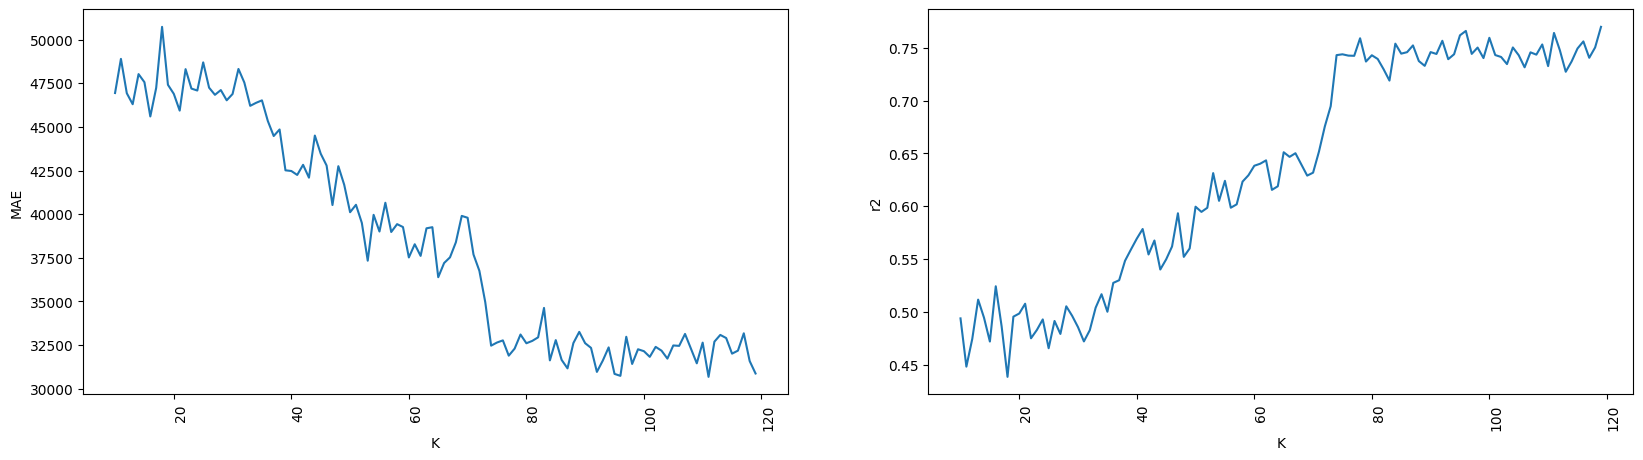

In [20]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [21]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass       5.410530e-05
MSZoning         2.142145e-08
LotFrontage      3.361765e-06
LotArea          1.328744e-02
Street           1.282371e-09
                     ...     
YrSold           5.049716e-03
SaleType         1.002265e-07
SaleCondition    3.038631e-08
Ageofhouse       1.228008e-05
SalePrice        6.306789e+09
Length: 75, dtype: float64

In [22]:
varr.loc[varr > 0.1].index

Index(['SalePrice'], dtype='object')

### 2.USING VarianceThreshold FROM SKLEARN

In [23]:
from sklearn.feature_selection import VarianceThreshold

In [24]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['SalePrice'], dtype='object')

In [25]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500):
    varr_thresh=VarianceThreshold(threshold=i/100000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,100,43384.609470,58778.513849,0.549574
1,101,43452.341689,58518.706623,0.553547
2,102,43976.908883,59809.885408,0.533628
3,103,42482.034852,58802.915873,0.549200
4,104,43067.034937,58511.951955,0.553650
...,...,...,...,...
395,495,59146.079007,74901.247267,0.268584
396,496,61530.359030,77602.317205,0.214881
397,497,58700.803430,75313.724280,0.260506
398,498,56754.640051,74774.229867,0.271063


In [26]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
11,111,40297.259468,56804.968050,0.579313
60,160,40659.933512,57117.328763,0.574674
52,152,40785.378582,56913.487039,0.577704
10,110,40837.328002,57106.446549,0.574836
15,115,41043.330514,56744.296638,0.580211
...,...,...,...,...
316,416,61870.513901,77143.536492,0.224137
364,464,62150.921838,77286.278739,0.221263
205,305,62715.689364,77939.289655,0.208048
322,422,62815.668500,78346.123175,0.199758


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_20464\873788412.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_20464\873788412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


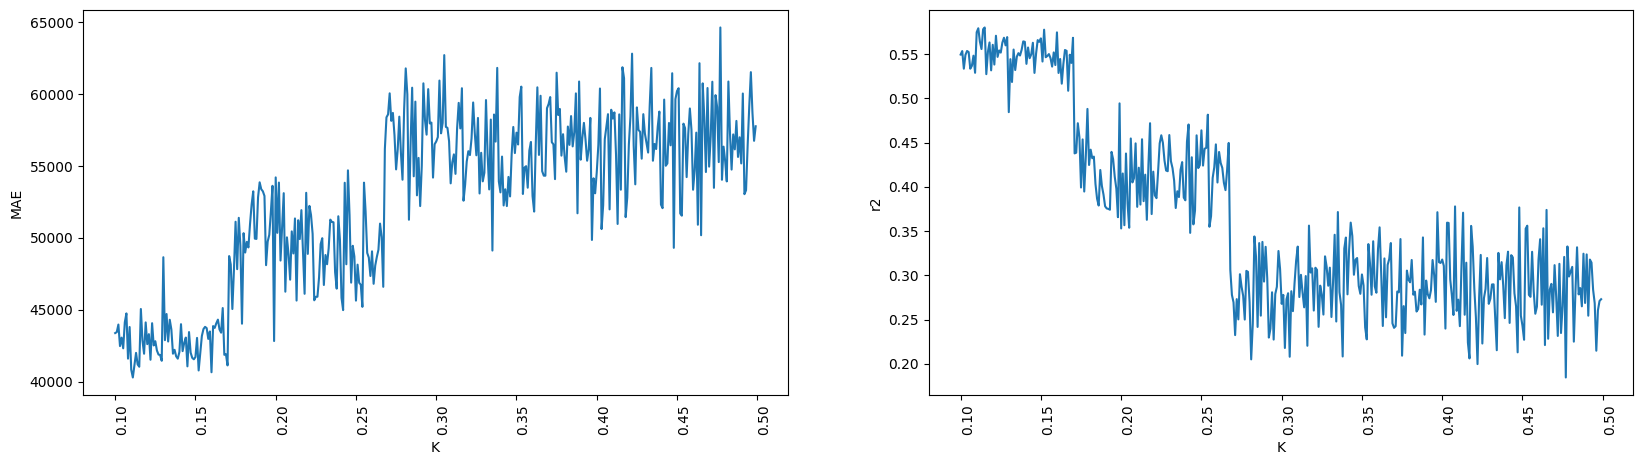

In [27]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


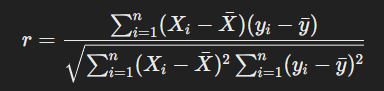

### Using numpy

In [28]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [29]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.03043571179887997


In [30]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

[]

### Using sklearn

In [31]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'Fireplaces', 'GarageCars',
       'GarageArea'], dtype=object)

In [32]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,51369.353037,69795.858947,0.364895
1,6,56519.760446,73071.429616,0.303884
2,7,51108.442760,68299.666067,0.391832
3,8,47021.790908,62962.881964,0.483161
4,9,46763.741057,62753.005883,0.486601
...,...,...,...,...
110,115,32154.486629,43720.342287,0.750797
111,116,31688.727145,43784.867942,0.750061
112,117,31558.472208,43529.278121,0.752970
113,118,32850.731333,45315.964006,0.732275


In [33]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
77,82,30417.256839,42758.394126,0.761642
69,74,30603.713727,42790.083328,0.761289
89,94,30915.547551,42137.894354,0.768510
74,79,31053.806089,44035.527114,0.747191
72,77,31156.740457,43724.244823,0.750753
...,...,...,...,...
11,16,50249.046337,64931.203530,0.450341
14,19,51072.979564,66326.120685,0.426471
2,7,51108.442760,68299.666067,0.391832
0,5,51369.353037,69795.858947,0.364895


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_20464\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_20464\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


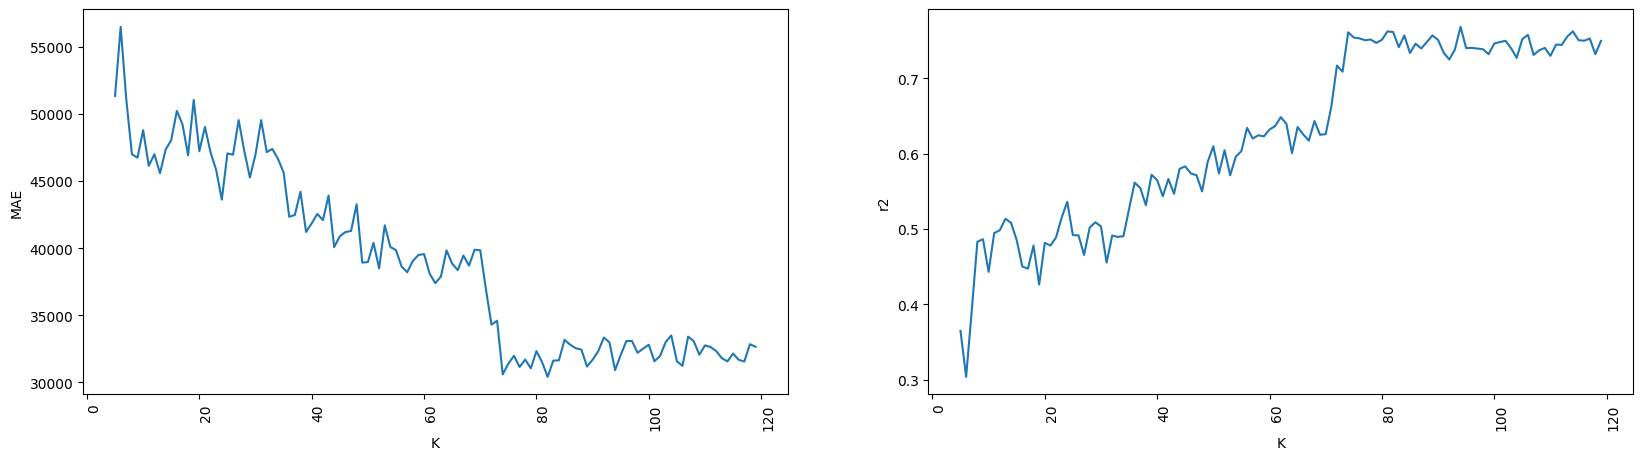

In [34]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

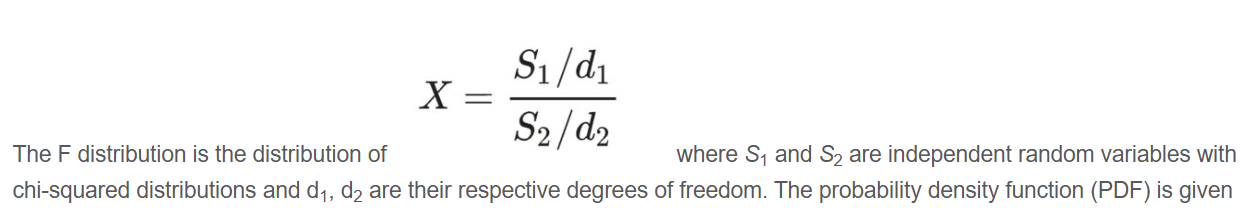

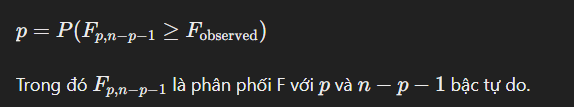

In [35]:
from sklearn.feature_selection import f_regression

In [36]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,40982.804927,56298.651079,0.586779
1,6,41955.629625,56291.429442,0.586885
2,7,43795.783344,56646.974679,0.581650
3,8,43276.570845,57369.222605,0.570914
4,9,40366.946712,55043.736008,0.604996
...,...,...,...,...
110,115,31810.609853,43984.784649,0.747773
111,116,34569.447645,46777.992819,0.714721
112,117,32518.450494,43872.191187,0.749063
113,118,30247.938225,41895.303937,0.771168


In [37]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
113,118,30247.938225,41895.303937,0.771168
52,57,30288.549606,42677.053851,0.762548
78,83,30393.246179,42845.844353,0.760666
54,59,30494.408070,42615.330808,0.763235
46,51,30681.919442,43895.749925,0.748793
...,...,...,...,...
1,6,41955.629625,56291.429442,0.586885
15,20,42180.812239,55224.530207,0.602396
5,10,42322.901601,55295.296385,0.601377
3,8,43276.570845,57369.222605,0.570914


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_20464\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_20464\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


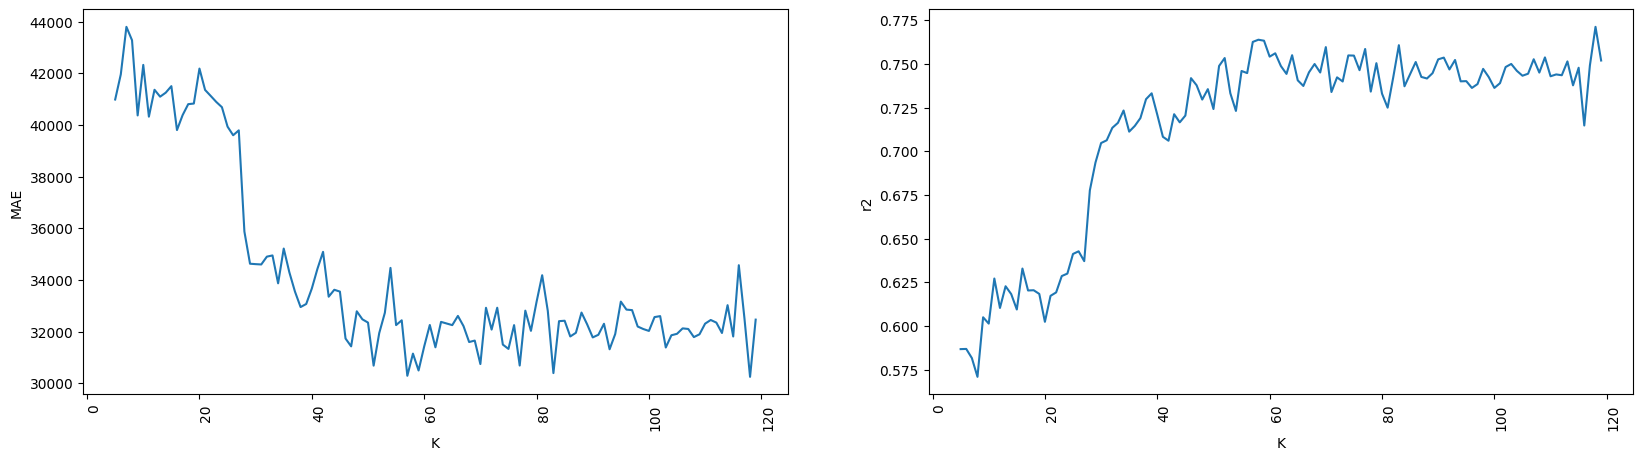

In [38]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

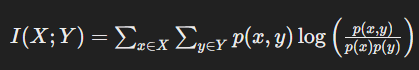

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

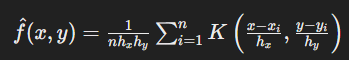

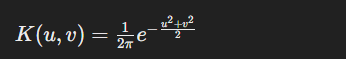

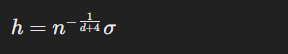

In [39]:
all_col=df.columns
all_col

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [40]:
from sklearn.feature_selection import mutual_info_regression

In [41]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,41496.176316,56407.514242,0.585180
1,6,41474.320230,56136.144823,0.589161
2,7,40885.284495,53683.116370,0.624282
3,8,41803.690431,54571.945113,0.611738
4,9,41576.718951,54590.255134,0.611477
...,...,...,...,...
110,115,31795.633326,43927.289098,0.748432
111,116,32502.728349,44684.245337,0.739688
112,117,32358.706979,44835.335525,0.737924
113,118,32017.557848,43964.186451,0.748009


In [42]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [43]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
69,74,30172.389846,42191.818511,0.767917
87,92,30272.556567,43087.362378,0.757961
48,53,30508.139290,43793.528581,0.749962
75,80,30531.409937,42308.331423,0.766634
49,54,30570.431789,43581.536073,0.752377
...,...,...,...,...
6,11,41115.172122,52468.502151,0.641092
1,6,41474.320230,56136.144823,0.589161
0,5,41496.176316,56407.514242,0.585180
4,9,41576.718951,54590.255134,0.611477


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_20464\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_20464\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


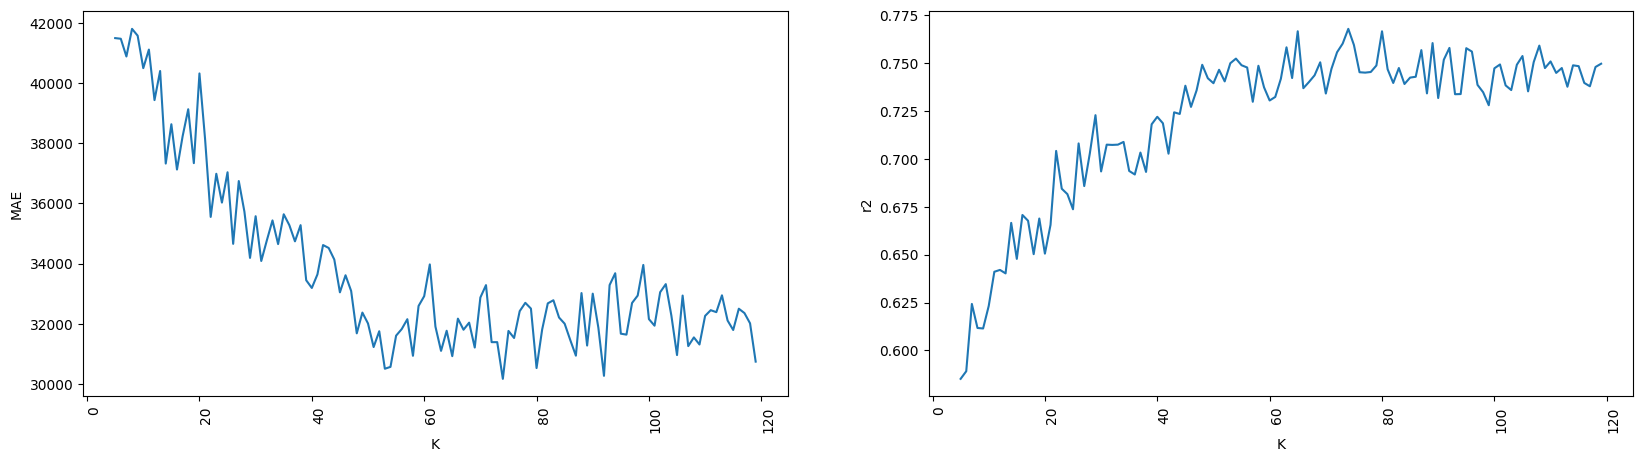

In [44]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [45]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,51369.353037,69795.858947,0.364895
1,6,56519.760446,73071.429616,0.303884
2,7,51108.442760,68299.666067,0.391832
3,8,47021.790908,62962.881964,0.483161
4,9,46763.741057,62753.005883,0.486601
...,...,...,...,...
110,115,32154.486629,43720.342287,0.750797
111,116,31688.727145,43784.867942,0.750061
112,117,31558.472208,43529.278121,0.752970
113,118,32850.731333,45315.964006,0.732275


In [46]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,40982.804927,56298.651079,0.586779
1,6,41955.629625,56291.429442,0.586885
2,7,43795.783344,56646.974679,0.581650
3,8,43276.570845,57369.222605,0.570914
4,9,40366.946712,55043.736008,0.604996
...,...,...,...,...
110,115,31810.609853,43984.784649,0.747773
111,116,34569.447645,46777.992819,0.714721
112,117,32518.450494,43872.191187,0.749063
113,118,30247.938225,41895.303937,0.771168


In [47]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,41496.176316,56407.514242,0.585180
1,6,41474.320230,56136.144823,0.589161
2,7,40885.284495,53683.116370,0.624282
3,8,41803.690431,54571.945113,0.611738
4,9,41576.718951,54590.255134,0.611477
...,...,...,...,...
110,115,31795.633326,43927.289098,0.748432
111,116,32502.728349,44684.245337,0.739688
112,117,32358.706979,44835.335525,0.737924
113,118,32017.557848,43964.186451,0.748009


In [48]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,51369.353037,69795.858947,0.364895,40982.804927,56298.651079,0.586779
1,6,56519.760446,73071.429616,0.303884,41955.629625,56291.429442,0.586885
2,7,51108.442760,68299.666067,0.391832,43795.783344,56646.974679,0.581650
3,8,47021.790908,62962.881964,0.483161,43276.570845,57369.222605,0.570914
4,9,46763.741057,62753.005883,0.486601,40366.946712,55043.736008,0.604996
...,...,...,...,...,...,...,...
110,115,32154.486629,43720.342287,0.750797,31810.609853,43984.784649,0.747773
111,116,31688.727145,43784.867942,0.750061,34569.447645,46777.992819,0.714721
112,117,31558.472208,43529.278121,0.752970,32518.450494,43872.191187,0.749063
113,118,32850.731333,45315.964006,0.732275,30247.938225,41895.303937,0.771168


In [49]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,51369.353037,69795.858947,0.364895,40982.804927,56298.651079,0.586779,41496.176316,56407.514242,0.585180
1,6,56519.760446,73071.429616,0.303884,41955.629625,56291.429442,0.586885,41474.320230,56136.144823,0.589161
2,7,51108.442760,68299.666067,0.391832,43795.783344,56646.974679,0.581650,40885.284495,53683.116370,0.624282
3,8,47021.790908,62962.881964,0.483161,43276.570845,57369.222605,0.570914,41803.690431,54571.945113,0.611738
4,9,46763.741057,62753.005883,0.486601,40366.946712,55043.736008,0.604996,41576.718951,54590.255134,0.611477
...,...,...,...,...,...,...,...,...,...,...
110,115,32154.486629,43720.342287,0.750797,31810.609853,43984.784649,0.747773,31795.633326,43927.289098,0.748432
111,116,31688.727145,43784.867942,0.750061,34569.447645,46777.992819,0.714721,32502.728349,44684.245337,0.739688
112,117,31558.472208,43529.278121,0.752970,32518.450494,43872.191187,0.749063,32358.706979,44835.335525,0.737924
113,118,32850.731333,45315.964006,0.732275,30247.938225,41895.303937,0.771168,32017.557848,43964.186451,0.748009


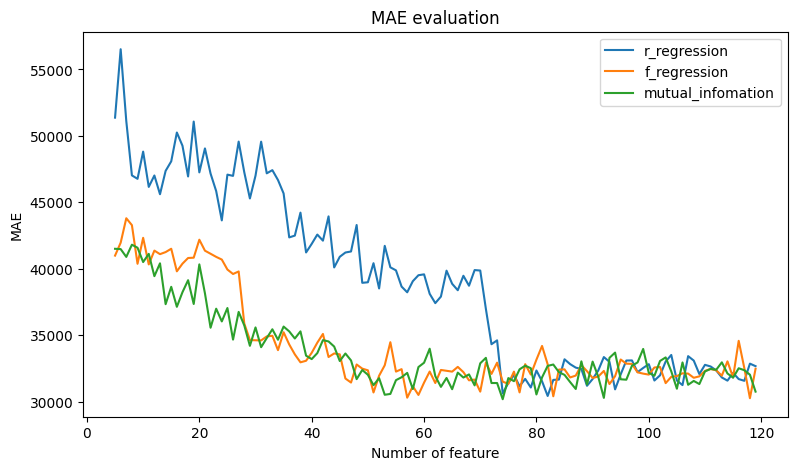

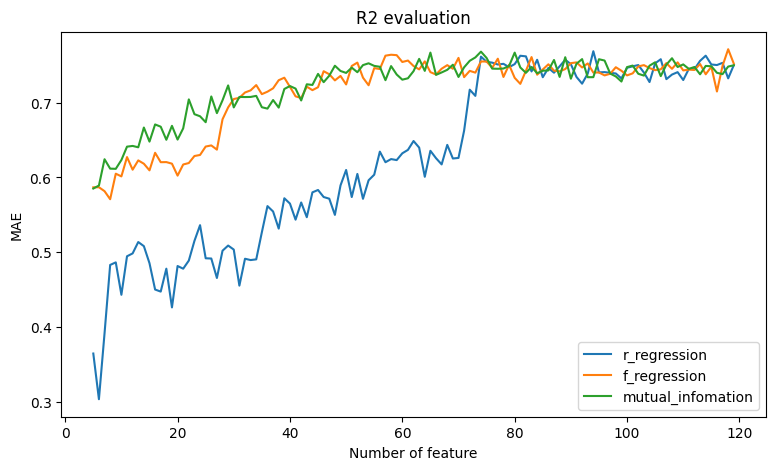

In [50]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()